In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tabulate import tabulate
from collections import Counter
from statistics import mean
from scipy.stats import entropy
# 
# 
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, RFE, SelectFromModel 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, roc_auc_score, recall_score, precision_score, RocCurveDisplay, precision_recall_fscore_support
# 
from skrebate import ReliefF
# 
# from chefboost import Chefboost as chef
# from C45algorithm import *
# 
# 

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Dematology
# 
column_names=['erythema', 'scaling', 'definite borders', 'itching', 
              'koebner phenomenon', 'polygonal papules', 'follicular papules', 
              'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement',
              'family history',' melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate',
              'fibrosis of the papillary dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis',
              'clubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis', 
              'spongiform pustule','munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer',
              'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug',
              'perifollicular parakeratosis','inflammatory monoluclear inflitrate', 'band-like infiltrate','Age', 'Class'                
]
df = pd.read_csv('./dataset/dermatology.data', names=column_names) # Dematology dataset [https://archive.ics.uci.edu/ml/datasets/dermatology]
# 
# 
# 

In [4]:
df.head(5)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
print('Dimension of Dataframe:', df.shape)
# 


Dimension of Dataframe: (366, 35)


In [6]:
# Target, Class, 
# Class Distribution:
#     Database:  Dermatology
    
#     Class code:   Class:                  Number of instances:
#     1             psoriasis			            112
#     2             seboreic dermatitis             61
#     3             lichen planus                   72
#     4             pityriasis rosea                49
#     5             cronic dermatitis               52    
#     6             pityriasis rubra pilaris        20
# 
# 
# 
# true_cases = df[(df['Class'] >= 1)].count()['Age']
# false_cases = len(df) - df[(df['Class'] >= 1)].count()['Age']
# true_cases_ratio = (true_cases/len(df))*100
# false_cases_ratio = (false_cases/len(df))*100
# # 
# print('Number of True cases: ', true_cases)
# print('Number of False cases: ', false_cases)
# # 
# print('Percentage ratio[True cases]: ', true_cases_ratio)
# print('Percentage ratio[False cases]: ', false_cases_ratio)
# 

In [7]:
df.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [8]:
# df = df.reset_index()

In [9]:
df.isna().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
 melanin incontinence                       0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [10]:
df = df.replace('?', np.nan)
# df = df.replace('inf', np.nan)

In [11]:
df = df.astype('float64')
# df['Class'] = df['Class'].astype('int64')
df.dtypes

erythema                                    float64
scaling                                     float64
definite borders                            float64
itching                                     float64
koebner phenomenon                          float64
polygonal papules                           float64
follicular papules                          float64
oral mucosal involvement                    float64
knee and elbow involvement                  float64
scalp involvement                           float64
family history                              float64
 melanin incontinence                       float64
eosinophils in the infiltrate               float64
PNL infiltrate                              float64
fibrosis of the papillary dermis            float64
exocytosis                                  float64
acanthosis                                  float64
hyperkeratosis                              float64
parakeratosis                               float64
clubbing of 

In [12]:
df.sum()

erythema                                      757.0
scaling                                       657.0
definite borders                              567.0
itching                                       500.0
koebner phenomenon                            232.0
polygonal papules                             164.0
follicular papules                             61.0
oral mucosal involvement                      138.0
knee and elbow involvement                    225.0
scalp involvement                             190.0
family history                                 46.0
 melanin incontinence                         148.0
eosinophils in the infiltrate                  51.0
PNL infiltrate                                200.0
fibrosis of the papillary dermis              123.0
exocytosis                                    501.0
acanthosis                                    716.0
hyperkeratosis                                193.0
parakeratosis                                 472.0
clubbing of 

#### Data Preprocessing

In [13]:
# 
class PreprocessDataFrame:
    """
      Preprocess the dataset. 
        Dataset is evenly distributed both in the training and testing, 
        \rto preserve the dataset proportions for better prediction and reproduceability of results.
    """
    def __init__(self, dataframe, features_size, target_size, test_ratio=0.25):
      self.dataframe = self.clean_null_values(dataframe) # determining the null values in each column and replacing them
      # self.dataframe = dataframe
      self.test_ratio = test_ratio
      self.feature_vector =  self.dataframe.iloc[:, :features_size].values
      # self.feature_vector =  self.dataframe.iloc[:, features_size:].values
      self.target_vector = self.dataframe.iloc[:, target_size:].values
      # self.target_vector = self.dataframe.iloc[:, :target_size].values

    # clean null values
    def clean_null_values(self, dataframe):
      """
        Determining the null values in each column and replacing them using the Mean imputation method
      """
      dataframe = dataframe.replace("?", np.nan)
      dataframe = dataframe.replace("NaN", np.nan)
      dataframe = dataframe.replace("inf", np.inf)
      # 
      indices_to_keep = ~dataframe.isin([np.nan, np.inf, -np.inf]).any(1)
      dataframe = dataframe[indices_to_keep].astype(np.float64)

      for column in dataframe.columns:
        dataframe[column] = dataframe[column].fillna(dataframe[column].mean())
      
        return dataframe

    # MinMax
    def minMaxScaler(self, feature_range=(0, 1), binarize_y=False, classes=[1,2,3,4,5,6], **kwargs):
      """
        Minmax scaler: Transform features by scaling each feature to a given range.
      """
      # Get the feature vector
      X = self.feature_vector

      # Get the target vector
      y = self.target_vector

      # first binarize y; for multiclass problems
      if (binarize_y):
        y = label_binarize(y, classes=classes)

      # splitting the dataset into  training and test set
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_ratio, random_state=42, stratify=y, **kwargs)

      # MinMaxScaling
      mm = MinMaxScaler(feature_range=feature_range)
      
      # feeding the independent data into the scaler
    
      # Standardize the training set
      X_train = mm.fit_transform(X_train)
      # X_train = mm.transform(X_train)

      # Standardize the testing set
      X_test = mm.fit_transform(X_test)
      # X_test = mm.transform(X_test)
      
      return X_train, X_test, y_train, y_test

# 
# 

In [14]:
# df.iloc[:, df.columns.size-13:]
# df.iloc[:, df.columns.size-1:]
# df.iloc[:, :df.columns.size-len(df.columns)+1]
# 
# 

In [15]:
# target = ['Class']
# 
X_train, X_test, y_train, y_test = PreprocessDataFrame(dataframe=df, test_ratio=0.20, target_size=df.columns.size-1, features_size=df.columns.size-1).minMaxScaler()
# 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# 
# 

(286, 34) (72, 34) (286, 1) (72, 1)


### Feature Selection

In [16]:
# 
#   FeatureSelection
# 
class FeatureSelection:

    def __init__(self) -> None:
        pass

    def _label_unbinarize(self, y_train):
        # 
        unbinarized_y_train = []

        for _class in y_train.tolist():
            if (_class.count(1) <= 0):
                unbinarized_y_train.append([1]) 
            else:
                unbinarized_y_train.append([_class.index(1) + 1]) 

        return np.array(unbinarized_y_train)

    def _majority_voting(self, columns_list: list, threshold: int = 2, total_feature_len: int = 5) -> list:
        """
            A simple voting technique used to combine features \n
            from different feature selection algorithms that were chosen by them.
        """
        # flatten the list
        flat_list = []
        for column_list in columns_list:
            flat_list += list(column_list) 
        # 
        # count the  number of duplicates of each feature 
        new_dict = dict(Counter(flat_list))
        # 
        # Get the feature that met the threshold 
        new_features_list = []
        for k in new_dict:
            if(new_dict[k] >= threshold):
                new_features_list.append(k)
                # 
        # 
        return new_features_list[:total_feature_len]

    def get_feature_rankings(self, dataframe_columns: list, algorithm: dict) -> dict:
        """
            Get feature scores from FS algorithm such as:
                - Mutual Info\n
                - Chi-squared\n
                - ReliefF\n

        """ 
        # 
        _emp_dict = {}
        # 
        try:
            # 
            algorithm_keys = list(algorithm.keys())
            # 
            if ('Mutual Info' in algorithm_keys):
                for col in dataframe_columns:
                    _emp_dict[col] = list(algorithm['Mutual Info'].scores_)[dataframe_columns.index(col)]

            elif ('Chi-squared' in algorithm_keys ):
                for col in dataframe_columns:
                    _emp_dict[col] = list(algorithm['Chi-squared'].scores_)[dataframe_columns.index(col)]

            elif ('ReliefF' in algorithm_keys):
                for col in dataframe_columns:
                    _emp_dict[col] = list(algorithm['ReliefF'].feature_importances_)[dataframe_columns.index(col)]
            else:
                pass
        except Exception as e:
            return SystemError(e)

        # sort feature scores from highest to lowest
        if (len(_emp_dict) > 0):
            _emp_dict = {k: v for k, v in sorted(_emp_dict.items(), key=lambda item: item[1], reverse=True)}
            return _emp_dict
        
        return dict()

    def _tabulate(self, _features: dict, headers: list) -> str:
        """
            Tabulate Features
        """
        _table = []
        for key in _features:
            _table.append((key, _features[key]))
        # 
        return tabulate(_table, headers=headers)

    def column_mean(self, _X_test: np.array,_column_index: int = 0) -> np.array:
        """
            Replace column by the mean of the column
        """
        # 
        # flip matrix [column-wise]
        res = np.rot90(_X_test)
        # calculate the mean
        res[_column_index] = [(sum(res[_column_index])/len(res[_column_index])) for i in range(len(_X_test))]
        # 
        return np.rot90(res)
    

    def _intrinsic_value(self, X, y, feature_loc, NaN=True):
        """
            Compute the intrinsic value of an attribute a for given examples.
            \n
            The Split Information value is a positive integer that describes the potential worth of splitting a branch from a node.\n 
            This in turn is the intrinsic value that the random variable possesses and will be used to remove the bias in the Information Gain Ratio calculation.\n
            \n
            Intrinsic value(x) = -Sum((|S[i]|/|S|)*log2(|S[i]|/S)) for i = i to n
            \n
            Where |S| is the number of possible values feature x can take, while |S[i]| is the number of actual values of feature x.
            \n\n\n
            
            Parameters
            ----------
                X : list of hashable
                    A list of hashable objects (examples)
                    corresponding to the given attributes a.
                    I.e. a[i] <--> Ex[i].

                y : list of hashable
                    A list of hashable objects (attributes)
                    corresponding to the given examples Ex.
                    I.e. a[i] <--> Ex[i].

                NaN : boolean, default=True
                Boolean indicating how nan==nan should be evaluated.
                Default == True to avoid division by 0 errors.

            Returns
            -------
            result : list of float
                Intrinsic values of attribute y for samples X.
        """
        # Check whether X and y have the same lengths.
        if (len(X) != len(y)):
            raise ValueError("X and y must be of the same size.")

        # If nan is True, replace all nan values in a by the string "__nan__"
        if (NaN):
            y = ['__nan__' if isinstance(x, float) and math.isnan(x) else x for x in y]

        sum_Vs = []
        # rot_X = np.rot90(X)
        for i in range(len(X[0])):
            # 
            # Compute the sum of all values v in y
            sum_v = 0
            for v in set(y):
                X_y_v = [x for x, t in zip(X, y) if t == v]
                sum_v += (len(X_y_v) / len(X)) * math.log(len(X_y_v) / len(X), 2)
        # 
        # 
        return -sum_v
# 
# 
# 


In [17]:
# 
# FeatureSelectionPhase1
# 
class FeatureSelectionPhase1(FeatureSelection):
    """
        Feature Selection Phase 1
    """

    def __init__(self,_X_train, _y_train, _dataframe_cols:list, _select_k: int = 15) -> None:
        self._dataframe_columns = _dataframe_cols
        self._X_train = _X_train
        self._y_train =_y_train
        self._select_k = _select_k  # change this to how much features you want to keep from the top ones.  
        
    def mutual_info(self):
        # create the SelectKBest with the mutual info strategy.
        # MI_selection = SelectKBest(mutual_info_classif, k=self._select_k).fit(self._X_train, self._label_unbinarize(self._y_train))
        MI_selection = SelectKBest(mutual_info_classif, k=self._select_k).fit(self._X_train, self._y_train)

        # return the k selected features.
        # MI_features = df.iloc[:, :df.columns.size-1].columns[MI_selection.get_support()]

        return self.get_feature_rankings(self._dataframe_columns, algorithm={'Mutual Info': MI_selection})
    
    def chi_squared(self):
        
        # apply the chi2 score on the data and target (target should be binary).  
        CS_selection = SelectKBest(chi2, k=self._select_k).fit(self._X_train, self._y_train)
        # OneVsRestClassifier

        # return the k selected features and scores
        # CS_features = df.iloc[:, :df.columns.size-1].columns[CS_selection.get_support()]

        return self.get_feature_rankings(self._dataframe_columns, algorithm={'Chi-squared': CS_selection})

    def reliefF(self, n_neighbors=100):
        #  Using Manhattan distance
        # 
        # create the SelectKBest with the mutual info strategy.
        # RF_selection = SelectFromModel(estimator= ReliefF(n_features_to_select=self._select_k, n_neighbors=n_neighbors), max_features=self._select_k, threshold=-np.inf).fit(self._X_train, self._y_train.flatten())
        RF_selection = ReliefF(n_features_to_select=self._select_k, n_neighbors=n_neighbors, discrete_threshold=10).fit(self._X_train, self._y_train.flatten())
        # 
        # return the retained features.
        # RF_features = df.iloc[:, :df.columns.size-1].columns[RF_selection.get_support()]
        
        return self.get_feature_rankings(self._dataframe_columns, algorithm={'ReliefF': RF_selection})

    def info_gain_ratio(self):
        """
            Information gain ratio is the ratio between information gain and
            the entropy of the feature's
            value distribution. The score was introduced in [Quinlan1986]_
            to alleviate overestimation for multi-valued features. See `Wikipedia entry on gain ratio
            <http://en.wikipedia.org/wiki/Information_gain_ratio>`_.
            .. [Quinlan1986] J R Quinlan: Induction of Decision Trees, Machine Learning, 1986.
            \n\n
            Gain Ratio(y,x) = information gain(y,x)/intrinsic value(x)
        """
        # 
        MI_selection = SelectKBest(mutual_info_classif, k=len(self._X_train[0])).fit(self._X_train, self._y_train)
        # 
        info_gain_emp_dict = {}
        for col in self._dataframe_columns:
                    info_gain_emp_dict[col] = list(MI_selection.scores_)[self._dataframe_columns.index(col)]
        # 
        _entropy_dist = entropy(self._X_train, base=2)
        #
        for key, value in info_gain_emp_dict.items():
            intrinsic_value = _entropy_dist[list(info_gain_emp_dict.keys()).index(key)]
            info_gain_emp_dict[key] = value/intrinsic_value
        # 
        # select the best k features
        # sort feature scores from highest to lowest
        if (len(info_gain_emp_dict) > 0):
            info_gain_emp_dict = {k: v for k, v in sorted(info_gain_emp_dict.items(), key=lambda item: item[1], reverse=True)}
            return info_gain_emp_dict
        # 
        return dict()
# 
# 
# FeatureSelectionPhase2
# 
class FeatureSelectionPhase2(FeatureSelection):
    """
        Feature Selection Phase 2
    """
    def __init__(self, _X_train, _y_train, _X_test, _y_test, _dataframe_columns:list, _target_col_name: str = 'Class', _select_k: int = 10) -> None:
        self._dataframe_columns = _dataframe_columns
        self._X_train = _X_train
        self._y_train =_y_train
        self._X_test = _X_test
        self._y_test = _y_test
        self._target_col_name = _target_col_name # 'Class', 'C-Risk Level', 'Target'
        self._select_k = _select_k  # change this to how much features you want to keep from the top ones.

    def rfe_svm(self, dataframe):
        """
            RFE_SVM i.e recursive feature elimination using an SVM
        """
        # 
        # create a copy of the dataframe  
        # df_copy = df[self._dataframe_columns]

        # create the SelectKBest with the mutual info strategy. 
        # OneVsRestClassifier
        # RFE_selection = RFE(estimator=SVC(kernel="linear"), n_features_to_select=self._select_k, step=3).fit(self._X_train, self._label_unbinarize(self._y_train))
        RFE_selection = RFE(estimator=SVC(kernel="linear"), n_features_to_select=self._select_k, step=3).fit(self._X_train, self._y_train)
        # RFE_selection = RFE(estimator=SVC(kernel="linear"), n_features_to_select=self._select_k, step=3).fit(self._X_train, self._y_train)
        RFE_features = dataframe.iloc[:, :dataframe.columns.size-1].columns[RFE_selection.support_]
        # 
        # return the optimal features 
        return list(RFE_features)
    
    def prifeb(self, C=100, gamma=10, n_estimators=5):
        """
            PRIFEB(Prediction Risk based Feature sElection for Bagging):
                The embedded feature selection model with the prediction risk criteria is employed 
                to select relevant features for the individuals of bagging of SVM.
            
                https://en.wikipedia.org/wiki/Feature_selection
        """
        # 
        _base_estimator = SVC(C=C, gamma=gamma)
        Prifeb_selection = BaggingClassifier(base_estimator=_base_estimator, n_estimators=n_estimators, 
                                bootstrap=True, bootstrap_features=False, random_state=0).fit(self._X_train, self._y_train)

        _retained_columns = []
        train_error = 1 - Prifeb_selection.score(self._X_train, self._y_train)
        # 
        #  select features
        for i in range(self._X_test.shape[1]):
            mean_of_column = self.column_mean(self._X_test, i)
            test_error = 1 - Prifeb_selection.score(mean_of_column, self._y_test)
            # 
            if ((test_error - train_error) > 0):
                _retained_columns.append(i)
        # 
        # 
        # return the top N optimal features
        return [self._dataframe_columns[i] for i in _retained_columns][:self._select_k]

    def mifeb(self, RMI=0.9):
        """
            MIFEB(Mutual Information based Feature sElection for Bagging):
                The mutual information criteria has been widely used in the filter feature selection model, 
                therefore, we employ this method to bagging and propose a method
        """
        # Generate data using mutual information
        MI_selection = SelectKBest(mutual_info_classif, k=len(self._dataframe_columns)).fit(self._X_train, self._y_train)
        MI_data = self.get_feature_rankings(self._dataframe_columns, algorithm={'Mutual Info': MI_selection})
        # 
        _retained_columns = []
        SUM_MI = sum(list(MI_data.values()))
        # 
        # Select all of the first features as the optimal subset, whose total values
        # should be greater than RMI ∗ SUM(MI). RMI is a pre-defined ratio which
        # is greater than 0 but less than 1.
        # 
        criterion = RMI*SUM_MI
        # 
        for k,v in enumerate(MI_data):
            if (MI_data[v] > criterion):
                _retained_columns.append(list(MI_data.keys())[k])
        # 
        # return the optimal features
        return _retained_columns
# 
# 
# 

##### Feature Selection Phase 1

In [18]:
# 
dataframe_cols = list(df.columns)
dataframe_cols.remove('Class')
# 
# dataframe_cols
# 
len(dataframe_cols)
# 

34

In [19]:
# 
FS1 = FeatureSelectionPhase1(X_train, y_train, dataframe_cols, _select_k=22)
# 
chi_squared = FS1.chi_squared()
# 
mutual_info = FS1.mutual_info()
# 
gain_ratio = FS1.info_gain_ratio()
# 
reliefF = FS1.reliefF()
# 
# Highest to Lowest [Descending order]
# 
# 

In [20]:
# chi_squared
# 
print(FS1._tabulate(chi_squared, headers = ['Features', 'Chi-squared values']))
# 
# 

Features                                    Chi-squared values
----------------------------------------  --------------------
band-like infiltrate                                 200.949
perifollicular parakeratosis                         191.25
fibrosis of the papillary dermis                     178.63
saw-tooth appearance of retes                        173.459
vacuolisation and damage of basal layer              169.431
polygonal papules                                    168.737
melanin incontinence                                 156.684
follicular horn plug                                 151.445
follicular papules                                   148.462
focal hypergranulosis                                146.711
oral mucosal involvement                             144.632
clubbing of the rete ridges                          135.131
thinning of the suprapapillary epidermis             128.573
elongation of the rete ridges                        104.226
knee and elbow involve

In [21]:
# mutual_info
# 
print(FS1._tabulate(mutual_info, headers = ['Features', 'Mutual Information values']))
# 
# 

Features                                    Mutual Information values
----------------------------------------  ---------------------------
elongation of the rete ridges                               0.582997
clubbing of the rete ridges                                 0.541736
thinning of the suprapapillary epidermis                    0.532487
band-like infiltrate                                        0.514115
focal hypergranulosis                                       0.482999
spongiosis                                                  0.478432
saw-tooth appearance of retes                               0.473901
vacuolisation and damage of basal layer                     0.46192
melanin incontinence                                        0.45942
polygonal papules                                           0.450081
exocytosis                                                  0.428552
knee and elbow involvement                                  0.395402
oral mucosal involvement          

In [22]:
# # gain_ratio
# # 
print(FS1._tabulate(gain_ratio, headers = ['Features', 'Gain Ratio values']))
# gain_ratio
# # 

Features                                    Gain Ratio values
----------------------------------------  -------------------
clubbing of the rete ridges                        0.0970888
band-like infiltrate                               0.0906696
elongation of the rete ridges                      0.0836735
vacuolisation and damage of basal layer            0.0830171
saw-tooth appearance of retes                      0.0823615
thinning of the suprapapillary epidermis           0.0800826
melanin incontinence                               0.0797163
oral mucosal involvement                           0.0772831
focal hypergranulosis                              0.0746637
fibrosis of the papillary dermis                   0.0705013
spongiosis                                         0.0694465
polygonal papules                                  0.0652622
follicular horn plug                               0.0641953
munro microabcess                                  0.0589122
knee and elbow involve

In [23]:
# reliefF
# 
print(FS1._tabulate(reliefF, headers = ['Features', 'ReliefF values']))
# 

Features                                    ReliefF values
----------------------------------------  ----------------
clubbing of the rete ridges                      0.607426
thinning of the suprapapillary epidermis         0.597234
elongation of the rete ridges                    0.591681
exocytosis                                       0.469176
spongiosis                                       0.461067
band-like infiltrate                             0.427227
knee and elbow involvement                       0.420967
vacuolisation and damage of basal layer          0.405501
scalp involvement                                0.402374
melanin incontinence                             0.396907
saw-tooth appearance of retes                    0.395171
polygonal papules                                0.382349
focal hypergranulosis                            0.374674
oral mucosal involvement                         0.359982
PNL infiltrate                                   0.352698
munro microa

##### Feature Selection Phase 2

In [24]:
# combination of features from phase 1
# 
_phase1_features = FeatureSelection()._majority_voting([list(chi_squared.keys()), list(mutual_info.keys()), list(gain_ratio.keys()), list(reliefF.keys())], total_feature_len=22)
# 
# 
_phase1_fs_df = df[_phase1_features + ['Class']] # + df['Class']
# 
# len(_phase1_features), len(_phase1_fs_df.columns)
# 
# 

In [25]:
# target = ['Class']
# 
_phase1_fs_X_train, _phase1_fs_X_test, _phase1_fs_y_train, _phase1_fs_y_test = PreprocessDataFrame(dataframe=_phase1_fs_df, test_ratio=0.20, target_size=_phase1_fs_df.columns.size-1, features_size=_phase1_fs_df.columns.size-1).minMaxScaler()
# 
print(_phase1_fs_X_train.shape, _phase1_fs_X_test.shape, _phase1_fs_y_train.shape, _phase1_fs_y_test.shape)
# 
# 

(292, 22) (74, 22) (292, 1) (74, 1)


In [26]:
_phase1_fs_dataframe_cols = list(_phase1_fs_df.columns)
_phase1_fs_dataframe_cols.remove('Class')
# 
# _phase1_fs_dataframe_cols
# 
len(_phase1_fs_dataframe_cols)
# 

22

In [27]:
# 
FS2 = FeatureSelectionPhase2(_phase1_fs_X_train, _phase1_fs_y_train, _phase1_fs_X_test, _phase1_fs_y_test, _phase1_fs_dataframe_cols, _select_k=12)
# 
rfe_svm = FS2.rfe_svm(_phase1_fs_df)
# 
prifeb = FS2.prifeb()
# 
mifeb = FS2.mifeb(RMI=0.05)

In [28]:
# rfe_svm
# 
rfe_svm, len(rfe_svm)
# 

(['band-like infiltrate',
  'perifollicular parakeratosis',
  'fibrosis of the papillary dermis',
  'polygonal papules',
  'follicular papules',
  'focal hypergranulosis',
  'clubbing of the rete ridges',
  'thinning of the suprapapillary epidermis',
  'elongation of the rete ridges',
  'spongiosis',
  'exocytosis',
  'disappearance of the granular layer'],
 12)

In [29]:
# prifeb
# 
prifeb, len(prifeb)
# 

(['band-like infiltrate',
  'perifollicular parakeratosis',
  'fibrosis of the papillary dermis',
  'saw-tooth appearance of retes',
  'vacuolisation and damage of basal layer',
  'polygonal papules',
  ' melanin incontinence',
  'follicular horn plug',
  'follicular papules',
  'focal hypergranulosis',
  'oral mucosal involvement',
  'clubbing of the rete ridges'],
 12)

In [30]:
# mifeb
# 
# print(FS2._tabulate(mifeb, headers = ['Features', 'Mifeb values']))
mifeb,len(mifeb)

(['clubbing of the rete ridges',
  'elongation of the rete ridges',
  'saw-tooth appearance of retes',
  'vacuolisation and damage of basal layer',
  'thinning of the suprapapillary epidermis',
  ' melanin incontinence',
  'polygonal papules',
  'focal hypergranulosis',
  'oral mucosal involvement',
  'band-like infiltrate',
  'spongiosis',
  'exocytosis',
  'fibrosis of the papillary dermis'],
 13)

### Classification Learning Algorithms

In [31]:
# 
# 
# SVM, KNN, MLP, Decision-Trees(C4.5), Gaussian NB & Logistic Regression
# Ensemble: Bagging, Boosting, Stacking (Logistic Regression as Meta Model)
# [https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee]
# 
# 
# https://naeglelab.github.io/OpenEnsembles/OpenEnsembles.html
# 
# 

In [32]:
# 
# combination of features from phase 2
# 
# _phase2_features = rfe_svm
# 
_phase2_features = FeatureSelection()._majority_voting([rfe_svm, prifeb, mifeb], total_feature_len=12)
# 
_phase2_fs_df = df[_phase2_features + ['Class']] # + df['Class']
# 
len(_phase2_features), len(_phase2_fs_df.columns)
# 

(12, 13)

In [33]:
_phase2_features

['band-like infiltrate',
 'perifollicular parakeratosis',
 'fibrosis of the papillary dermis',
 'polygonal papules',
 'follicular papules',
 'focal hypergranulosis',
 'clubbing of the rete ridges',
 'thinning of the suprapapillary epidermis',
 'elongation of the rete ridges',
 'spongiosis',
 'exocytosis',
 'saw-tooth appearance of retes']

In [34]:
# target = ['Class']
# 
_phase2_fs_X_train, _phase2_fs_X_test, _phase2_fs_y_train, _phase2_fs_y_test = PreprocessDataFrame(dataframe=_phase2_fs_df, test_ratio=0.43, target_size=_phase2_fs_df.columns.size-1, features_size=_phase2_fs_df.columns.size-1).minMaxScaler()
# 
print(_phase2_fs_X_train.shape, _phase2_fs_X_test.shape, _phase2_fs_y_train.shape, _phase2_fs_y_test.shape)
# 
# 

(208, 12) (158, 12) (208, 1) (158, 1)


#### Base Models

##### Support Vector Machine (SVM)

In [35]:
parameters = {
    'kernel':('linear', 'rbf'), 
    'C':[0.1, 1, 10, 100, 1000, 10000],
    'gamma':[0.00001, 0.0001, 0.001, 0.01],
    'random_state': [np.random.RandomState(0)],
    'probability':[True]
    }
# 
#
# Exhaustive search over specified parameter values for an estimator.
# svm_clf = OneVsRestClassifier(GridSearchCV(SVC(), parameters, cv=5, scoring='roc_auc')).fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
svm_clf = GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy').fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# 
# svm_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

##### Decision tree (CART Model)

In [36]:
# 
dt_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# 
# dt_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

##### Multilayer Perceptron (MLP)

In [37]:
# 
mlp_clf = OneVsRestClassifier(MLPClassifier(random_state=1, max_iter=100)).fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# 
# mlp_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

##### K-Nearest Neighbour (KNN)

In [38]:
# 
k_neigh_clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3)).fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# k_neigh_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

##### Gaussian Naive Bayes (G-Naive Bayes)

In [39]:
# 
Gauss_NB_clf = OneVsRestClassifier(GaussianNB()).fit(_phase2_fs_X_train, _phase2_fs_y_train) # (X_train, y_train)
# Gauss_NB_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) # (X_test, y_test)
# 

#### Ensemble Models

##### Bagging

In [40]:
# BaggingClassifier
# 
# OneVsRestClassifier(SVC())
# 
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# 
bag_svm_clf = OneVsRestClassifier(BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
bag_dt_clf = OneVsRestClassifier(BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
bag_mlp_clf = OneVsRestClassifier(BaggingClassifier(base_estimator=MLPClassifier(), n_estimators=10, random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
bag_k_neigh_clf = OneVsRestClassifier(BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
bag_Gauss_NB_clf = OneVsRestClassifier(BaggingClassifier(base_estimator=GaussianNB(), n_estimators=10, random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
# 

##### Boosting

In [41]:
# Adaboost
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# 
boost_svm_clf = OneVsRestClassifier(AdaBoostClassifier(base_estimator=SVC(), n_estimators=100, algorithm='SAMME', random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
boost_dt_clf = OneVsRestClassifier(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
# boost_mlp_clf = OneVsRestClassifier(AdaBoostClassifier(base_estimator=MLPClassifier(), n_estimators=100, algorithm='SAMME', random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# boost_Gauss_NB_clf
# boost_k_neigh_clf = OneVsRestClassifier(AdaBoostClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100, random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
boost_Gauss_NB_clf = OneVsRestClassifier(AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=100, algorithm='SAMME', random_state=0)).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
# 

##### Stacking [with Logistic Regression as Meta Model]

In [42]:
# Stacking
# 
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# 
estimators = [
    ('SVC', SVC()),
    ('DT', DecisionTreeClassifier()),
    ('MLP', MLPClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('NB', GaussianNB()),
]
# 
# 
stacking_clf = OneVsRestClassifier(StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(random_state=np.random.RandomState(0))
 )).fit(_phase2_fs_X_train, _phase2_fs_y_train)
# 
# 


#### Evaluation & Visualization

In [43]:
# 
# 
# confusion matrix 
# accuracy
# sensitivity
# specificity
# Recall
# Precision
# 
# 
# FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
# FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
# TP = np.diag(cnf_matrix)
# TN = cnf_matrix.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# 
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)
# # Overall accuracy for each class
# ACC = (TP+TN)/(TP+FP+FN+TN)
# 
# 
#   Model Evaluation and Visualization
# 
class ModelEvaluationAndVisualization:
    def __init__(self, model_clf, y_test: np.array, y_pred: np.array, labels=[1,2,3,4,5,6]) -> None:
        self.model_clf = model_clf
        self._y_test = y_test
        self._y_pred = y_pred # predictions
        self._labels = labels
        # 
        self.cnf_matrix = self.confusion_matrix()
        self.FP = self.cnf_matrix.sum(axis=0) - np.diag(self.cnf_matrix) 
        self.FN = self.cnf_matrix.sum(axis=1) - np.diag(self.cnf_matrix)
        self.TP = np.diag(self.cnf_matrix)
        self.TN = self.cnf_matrix.sum() - (self.FP + self.FN + self.TP)
        self.FP = self.FP.astype(float)
        self.FN = self.FN.astype(float)
        self.TP = self.TP.astype(float)
        self.TN = self.TN.astype(float)

    def confusion_matrix(self, **kwargs):
        """
            Confusion Matrix
            https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
        """
        # 
        return confusion_matrix(self._y_test, self._y_pred, labels=self.model_clf.classes_, **kwargs)

    def display_confusion_matrix(self, **kwargs):
        # 
        cf_matrix = self.confusion_matrix()
        # 
        # display
        # 
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                        cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                  zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        
        # 
        return sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues', cbar=True, **kwargs)

    def npv(self):
        """
            Negative predictive value
            NPV = TN/(TN+FN)
        """
        return self.TN/(self.TN+self.FN)

    def fpr(self):
        """
            Fall out or false positive rate
            FPR = FP/(FP+TN)
        """
        return self.FP/(self.FP+self.TN)

    def fnr(self):
        """
            False negative rate
            FNR = FN/(TP+FN)
        """
        return self.FN/(self.TP+self.FN)

    def fdr(self):
        """
            False discovery rate
            FDR = FP/(TP+FP)
        """
        return self.FP/(self.TP+self.FP)

    def accuracy_score(self):
        """
            Accuracy score
            Formula => Overall accuracy for each class = (TP+TN)/(TP+FP+FN+TN)
        """
        # return (self.TP+self.TN)/(self.TP+self.FP+self.FN+self.TN)
        return accuracy_score(self._y_test, self._y_pred)

    def sensitivity(self):
        """
            Formula => Sensitivity(TPR) = TP/(TP+FN)
        """
        return self.TP/(self.TP+self.FN)

    def specificity(self):
        """
            Formula => Specificity(TNR) = TN/(TN+FP)
        """
        return self.TN/(self.TN+self.FP)

    def precision_score(self):
        """
            Formula => Precision = Sum c in C TruePositives_c / Sum c in C (TruePositives_c + FalsePositives_c)
        """
        return precision_score(self._y_test, self._y_pred, labels=self._labels, average='micro')

    def recall_score(self):
        """
            Formula => Recall = Sum c in C TruePositives_c / Sum c in C (TruePositives_c + FalseNegatives_c)
        """
        # calculate recall
        return recall_score(self._y_test, self._y_pred, labels=self._labels, average='micro')

    def f1_score(self):
        """
            Formula => F-Measure = (2 * Precision * Recall) / (Precision + Recall)
        """
        return (2 * self.precision_score() * self.recall_score())/(self.precision_score() * self.recall_score())

    def support(self):
        """
            Support is the number of occurrences of each class in y_true
        """
        _,_,_,_support = precision_recall_fscore_support(self._y_test, self._y_pred)
        # 
        return list(_support)

    def precision_recall_fscore_support(self):
        """
            Sklearn's Precision/Recall/F1 Score/Support function
        """
        _precision, _recall, _fscore ,_support = precision_recall_fscore_support(self._y_test, self._y_pred)
        # 
        return mean(list(_precision)), mean(list(_recall)), mean(list(_fscore)), list(_support)
# 
# 
# 
# 
def flatten(t):
    """
        Flatten
    """
    return [item for sublist in t for item in sublist]
# 
# 
# 
def merge_dicts(_list_of_dicts: list) -> dict:
    """
        Merge Dicts
    """
    # 
    _dicts_keys = flatten([list(_dict.keys()) for _dict in _list_of_dicts])
    # 
    d = {}
    # 
    for key in set(_dicts_keys):
        for _dict in _list_of_dicts:
            try:
                d.setdefault(key, []).append(_dict[key])
            except KeyError:
                pass
    # 
    return d
# 
# 
# 
# FS1 methods:
# chi_squared
# mutual_info
# gain_ratio
# reliefF
# 
# 
# Create Data
#
models_x = models_x = ['SVM', 'DT', 'MLP', 'KNN', 'NB', 'Bag(SVM)', 'Bag(DT)', 'Bag(MLP)', 'Bag(KNN)', 'Bag(NB)', 'Boost(SVM)', 'Boost(DT)', 'Boost(NB)', 'Stacking[LogReg]']  # x
model_clfs = [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]# y = np.random.randint(low=0, high=100, size=10)
# 
# 

##### Feature Selection Phase 1

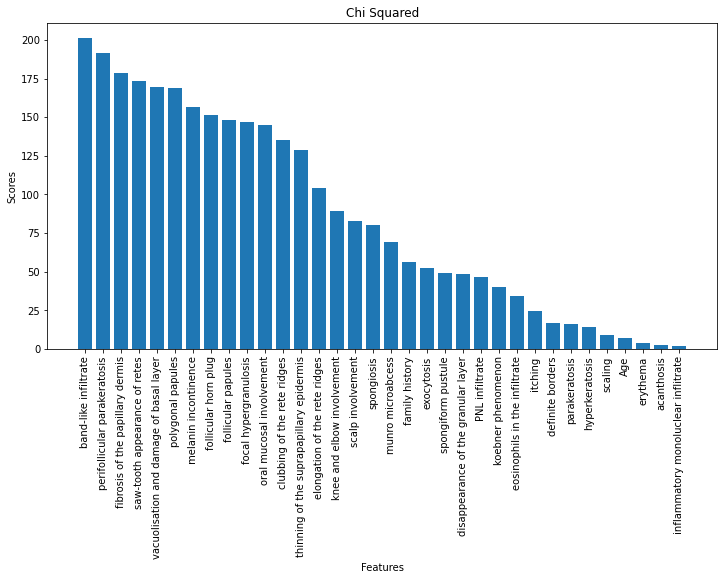

In [44]:
# 
# chi_squared
# 
chi_squared_x = list(chi_squared.keys())
# 
chi_squared_y = list(chi_squared.values())
# 
# Simple Bar Plot
# plt.figure(figsize=(6,12))
plt.figure(figsize=(12,6))
# plt.barh(chi_squared_x chi_squared_y)
plt.bar(chi_squared_x, chi_squared_y)
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel('Scores')
plt.title('Chi Squared')
plt.show()
# 
# 

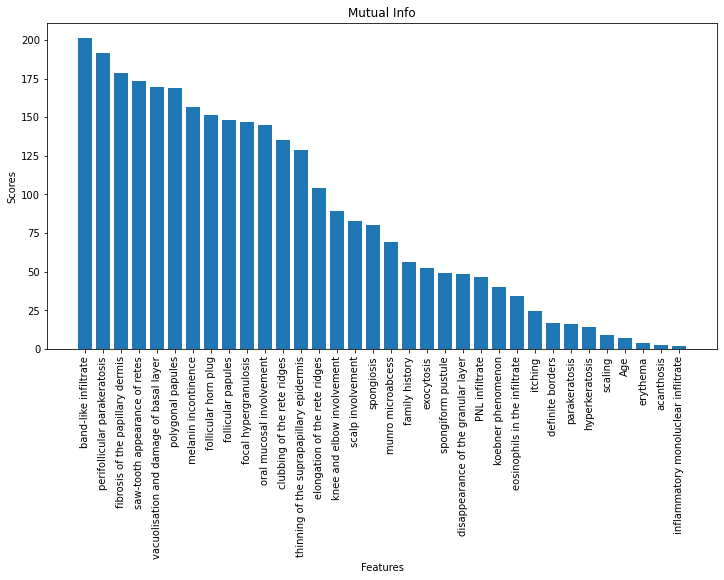

In [45]:
# 
# mutual_info
# 
mutual_info_x = list(mutual_info.keys())
# 
mutual_info_y = list(mutual_info.values())
# 
# Simple Bar Plot
# plt.figure(figsize=(6,12))
plt.figure(figsize=(12,6))
# plt.barh(chi_squared_x chi_squared_y)
plt.bar(chi_squared_x, chi_squared_y)
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel('Scores')
plt.title('Mutual Info')
plt.show()
# 
# 

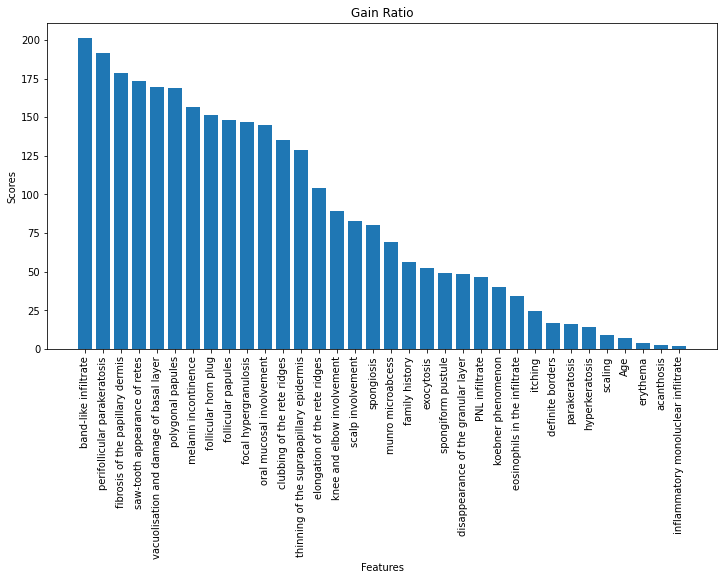

In [46]:
# 
# gain_ratio
# 
gain_ratio_x = list(gain_ratio.keys())
# 
gain_ratio_y = list(gain_ratio.values())
# 
# Simple Bar Plot
# plt.figure(figsize=(6,12))
plt.figure(figsize=(12,6))
# plt.barh(chi_squared_x chi_squared_y)
plt.bar(chi_squared_x, chi_squared_y)
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel('Scores')
plt.title('Gain Ratio')
plt.show()
# 
# 

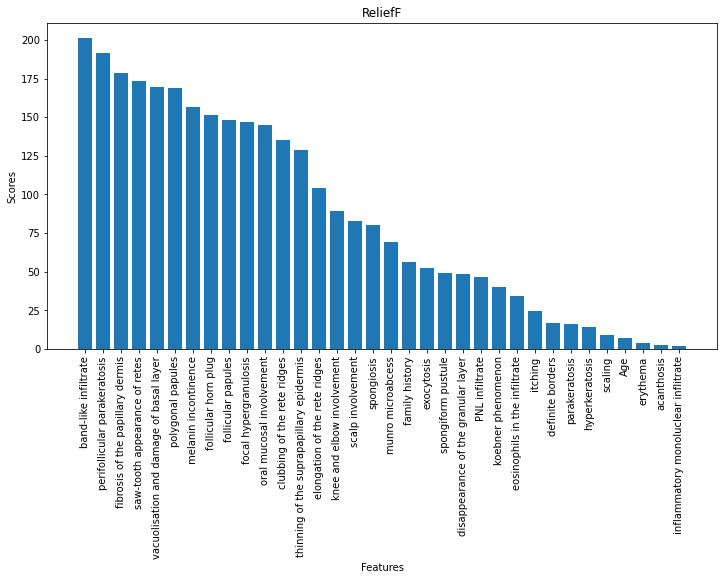

In [47]:
# 
# reliefF
# 
reliefF_x = list(reliefF.keys())
# 
reliefF_y = list(reliefF.values())
# 
# Simple Bar Plot
# plt.figure(figsize=(6,12))
plt.figure(figsize=(12,6))
# plt.barh(chi_squared_x chi_squared_y)
plt.bar(chi_squared_x, chi_squared_y)
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel('Scores')
plt.title('ReliefF')
plt.show()
# 
# 

In [48]:
# 
# 
merge_dicts = merge_dicts([chi_squared, mutual_info, gain_ratio, reliefF])
# print(merge_dicts)
# 
# merge_dicts
# 
# print(FS1._tabulate(merge_dicts, headers = ['Features', 'Feature Selection values [Chi-Squared, Mutual Info, Gain Ratio, ReliefF]']))    
# 
# 
fs_df = pd.DataFrame([[k] + v for k, v in merge_dicts.items()],
                    columns=['Features', 'Chi-Squared', 'Mutual Info', 'Gain Ratio', 'ReliefF'])
# 
# 
# plot grouped bar chart
# fs_df.plot(x='Features',
#         kind='bar',
#         stacked=False,
#         title='Grouped Bar Graph with dataframe')
# 
# fs_df.head(5)
fs_df.to_excel("results/FeatureSelectionTable-voting.xlsx")
# 
# 

/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:358: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if token is '':
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:2437: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if options['min_type'] is 'min' and options['min_value'] == 0:
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:2440: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if options['max_type'] is 'max' and options['max_value'] == 0:
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:4999: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if props[i]['type'] is 'number':
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:6827: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if data_bar['bar_axis_position'] is not 'none':
/usr/lib/python3/dist-packages/xlsxwriter/worksheet.py:6862: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if data_bar['bar_direction'] is 'left':
/usr/lib/python3/dist-pack

ModuleNotFoundError: No module named 'openpyxl'

##### Confusion Matrix

<AxesSubplot:>

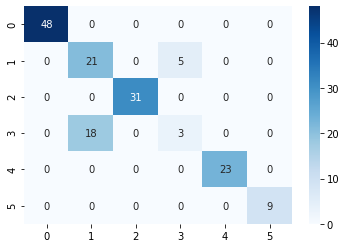

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# SVM
# 
ModelEvaluationAndVisualization(svm_clf, _phase2_fs_y_test, svm_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

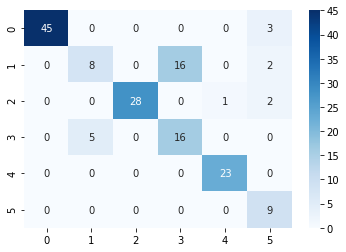

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# DT
# 
ModelEvaluationAndVisualization(dt_clf, _phase2_fs_y_test, dt_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

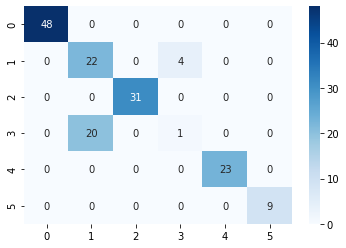

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# MLP
# 
ModelEvaluationAndVisualization(mlp_clf, _phase2_fs_y_test, mlp_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

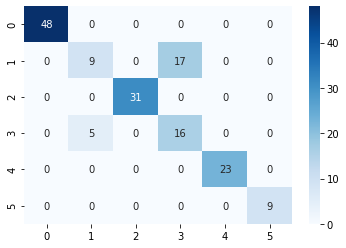

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# KNN
# 
ModelEvaluationAndVisualization(k_neigh_clf, _phase2_fs_y_test, k_neigh_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

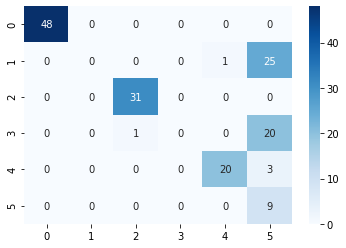

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Guassian NB
# 
ModelEvaluationAndVisualization(Gauss_NB_clf, _phase2_fs_y_test, Gauss_NB_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

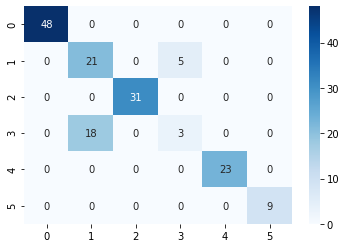

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (SVM)
# 
ModelEvaluationAndVisualization(bag_svm_clf, _phase2_fs_y_test, bag_svm_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

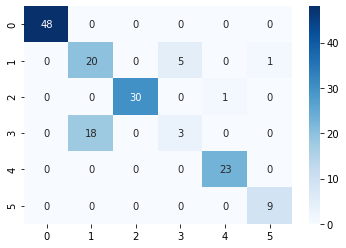

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (DT)
# 
ModelEvaluationAndVisualization(bag_dt_clf, _phase2_fs_y_test, bag_dt_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

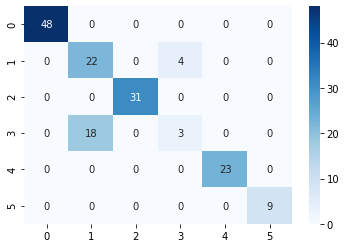

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (MLP)
# 
ModelEvaluationAndVisualization(bag_mlp_clf, _phase2_fs_y_test, bag_mlp_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

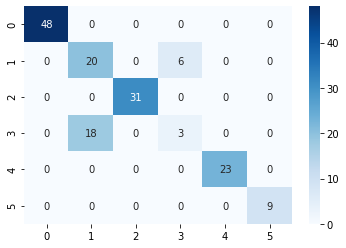

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (KNN)
# 
ModelEvaluationAndVisualization(bag_k_neigh_clf, _phase2_fs_y_test, bag_k_neigh_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

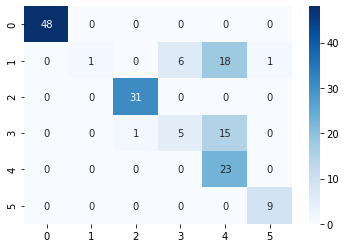

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Bagging (NB)
# 
ModelEvaluationAndVisualization(bag_Gauss_NB_clf, _phase2_fs_y_test, bag_Gauss_NB_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

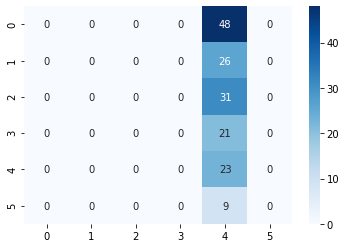

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Boosting (SVM)
# 
ModelEvaluationAndVisualization(boost_svm_clf, _phase2_fs_y_test, boost_svm_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

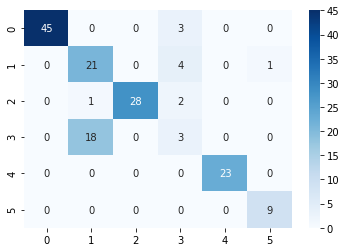

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Boosting (DT)
# 
ModelEvaluationAndVisualization(boost_dt_clf, _phase2_fs_y_test, boost_dt_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

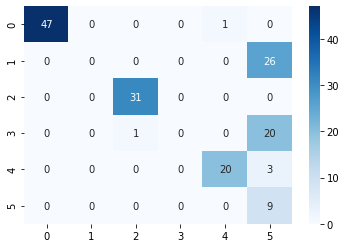

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Boosting (NB)
# 
ModelEvaluationAndVisualization(boost_Gauss_NB_clf, _phase2_fs_y_test, boost_Gauss_NB_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

<AxesSubplot:>

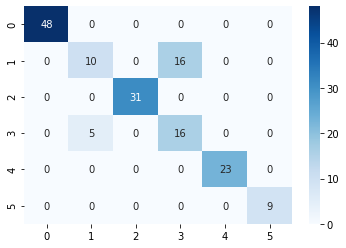

In [ ]:
# [svm_clf, dt_clf, mlp_clf, k_neigh_clf, Gauss_NB_clf, bag_svm_clf, bag_dt_clf, bag_mlp_clf, bag_k_neigh_clf, bag_Gauss_NB_clf, boost_svm_clf, boost_dt_clf, boost_Gauss_NB_clf, stacking_clf]
# Stacking
# 
ModelEvaluationAndVisualization(stacking_clf, _phase2_fs_y_test, stacking_clf.predict(_phase2_fs_X_test)).display_confusion_matrix()
# 

##### Accuracy

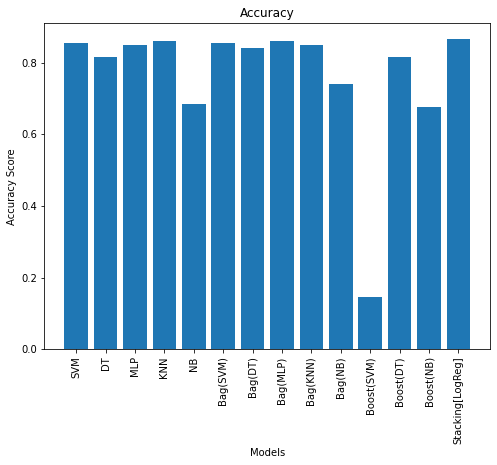

In [ ]:
# 
# accuracy_score
# 
accuracy_score_y = [(ModelEvaluationAndVisualization(model, _phase2_fs_y_test, model.predict(_phase2_fs_X_test)).accuracy_score()) for model in model_clfs]
# 
# Simple Bar Plot
plt.figure(figsize=(8,6))
plt.bar(models_x, accuracy_score_y)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel("Accuracy Score")
plt.title('Accuracy')
plt.show()
# 

In [ ]:
# 
# 
accuracy_table = {}
# accuracy_score_y
for index, model_clf_name in enumerate(models_x):
    accuracy_table[model_clf_name] = accuracy_score_y[index]
# 
# 
# accuracy_table
print(FS1._tabulate(accuracy_table, headers = ['Models', 'Accuracy values']))
# 

Models              Accuracy values
----------------  -----------------
SVM                        0.85443
DT                         0.816456
MLP                        0.848101
KNN                        0.860759
NB                         0.683544
Bag(SVM)                   0.85443
Bag(DT)                    0.841772
Bag(MLP)                   0.860759
Bag(KNN)                   0.848101
Bag(NB)                    0.740506
Boost(SVM)                 0.14557
Boost(DT)                  0.816456
Boost(NB)                  0.677215
Stacking[LogReg]           0.867089


##### Precision

In [ ]:
# 
precision_score_y = [
    ModelEvaluationAndVisualization(model_clf, _phase2_fs_y_test, model_clf.predict(_phase2_fs_X_test)).precision_score() for model_clf in model_clfs
]
# 
precision_table = {}
# ModelEvaluationAndVisualization(linear_svm_clf, _phase2_fs_y_test, linear_svm_clf.predict(_phase2_fs_X_test)).precision_score()
for index, model_clf_name in enumerate(models_x):
    precision_table[model_clf_name] = precision_score_y[index]
# 
# 
# precision_table
print(FS1._tabulate(precision_table, headers = ['Models', 'Precision values']))
# 

Models              Precision values
----------------  ------------------
SVM                         0.85443
DT                          0.816456
MLP                         0.848101
KNN                         0.860759
NB                          0.683544
Bag(SVM)                    0.85443
Bag(DT)                     0.841772
Bag(MLP)                    0.860759
Bag(KNN)                    0.848101
Bag(NB)                     0.740506
Boost(SVM)                  0.14557
Boost(DT)                   0.816456
Boost(NB)                   0.677215
Stacking[LogReg]            0.867089


##### Recall

In [ ]:
# 
recall_score_y = [
    ModelEvaluationAndVisualization(model_clf, _phase2_fs_y_test, model_clf.predict(_phase2_fs_X_test)).recall_score() for model_clf in model_clfs
]
# 
recall_table = {}
# ModelEvaluationAndVisualization(linear_svm_clf, _phase2_fs_y_test, linear_svm_clf.predict(_phase2_fs_X_test)).recall_score()
for index, model_clf_name in enumerate(models_x):
    recall_table[model_clf_name] = recall_score_y[index]
# 
# 
# recall_table
print(FS1._tabulate(recall_table, headers = ['Models', 'Recall values']))
# 

Models              Recall values
----------------  ---------------
SVM                      0.85443
DT                       0.816456
MLP                      0.848101
KNN                      0.860759
NB                       0.683544
Bag(SVM)                 0.85443
Bag(DT)                  0.841772
Bag(MLP)                 0.860759
Bag(KNN)                 0.848101
Bag(NB)                  0.740506
Boost(SVM)               0.14557
Boost(DT)                0.816456
Boost(NB)                0.677215
Stacking[LogReg]         0.867089


##### Sensitivity

In [ ]:
# 
sensitivity_score_y = [
    mean(ModelEvaluationAndVisualization(model_clf, _phase2_fs_y_test, model_clf.predict(_phase2_fs_X_test)).sensitivity()) for model_clf in model_clfs
]
# 
sensitivity_table = {}
# ModelEvaluationAndVisualization(linear_svm_clf, _phase2_fs_y_test, linear_svm_clf.predict(_phase2_fs_X_test)).sensitivity_score()
for index, model_clf_name in enumerate(models_x):
    sensitivity_table[model_clf_name] = sensitivity_score_y[index]

# 
# 
# sensitivity_table
print(FS1._tabulate(sensitivity_table, headers = ['Models', 'Sensitivity values']))
# 
# 

Models              Sensitivity values
----------------  --------------------
SVM                           0.825092
DT                            0.818387
MLP                           0.815629
KNN                           0.851343
NB                            0.644928
Bag(SVM)                      0.825092
Bag(DT)                       0.813305
Bag(MLP)                      0.831502
Bag(KNN)                      0.818681
Bag(NB)                       0.712759
Boost(SVM)                    0.166667
Boost(DT)                     0.798546
Boost(NB)                     0.641455
Stacking[LogReg]              0.857753


##### Specificity

In [ ]:
# 
specificity_score_y = [
    mean(ModelEvaluationAndVisualization(model_clf, _phase2_fs_y_test, model_clf.predict(_phase2_fs_X_test)).specificity()) for model_clf in model_clfs
]
# 
specificity_table = {}
# ModelEvaluationAndVisualization(linear_svm_clf, _phase2_fs_y_test, linear_svm_clf.predict(_phase2_fs_X_test)).specificity_score()
for index, model_clf_name in enumerate(models_x):
    specificity_table[model_clf_name] = specificity_score_y[index]

# 
# 
# specificity_table
print(FS1._tabulate(specificity_table, headers = ['Models', 'Specificity values']))
# 
# 

Models              Specificity values
----------------  --------------------
SVM                           0.97119
DT                            0.965158
MLP                           0.969881
KNN                           0.973006
NB                            0.943762
Bag(SVM)                      0.97119
Bag(DT)                       0.968837
Bag(MLP)                      0.972407
Bag(KNN)                      0.969973
Bag(NB)                       0.949529
Boost(SVM)                    0.833333
Boost(DT)                     0.963943
Boost(NB)                     0.942643
Stacking[LogReg]              0.974222


##### Precision/Recall/Fscore/Support

In [ ]:
# 
precision_recall_fscore_support_score_y = [
    ModelEvaluationAndVisualization(model_clf, _phase2_fs_y_test, model_clf.predict(_phase2_fs_X_test)).precision_recall_fscore_support() for model_clf in model_clfs
]
# 
precision_recall_fscore_support_table = {}
# ModelEvaluationAndVisualization(linear_svm_clf, _phase2_fs_y_test, linear_svm_clf.predict(_phase2_fs_X_test)).precision_recall_fscore_support_score()
for index, model_clf_name in enumerate(models_x):
    precision_recall_fscore_support_table[model_clf_name] = precision_recall_fscore_support_score_y[index]

# 
# 
# precision_recall_fscore_support_table
print(FS1._tabulate(precision_recall_fscore_support_table, headers = ['Models', '[Precision, Recall, F1 score & Support] values']))
# 
# 

Models            [Precision, Recall, F1 score & Support] values
----------------  ----------------------------------------------------------------------------------------
SVM               (0.8189102564102564, 0.825091575091575, 0.808841732979664, [48, 26, 31, 21, 23, 9])
DT                (0.7727029914529915, 0.8183871460081138, 0.7716079795456904, [48, 26, 31, 21, 23, 9])
MLP               (0.7873015873015873, 0.8156288156288156, 0.7873303167420814, [48, 26, 31, 21, 23, 9])
KNN               (0.8546176046176046, 0.8513431013431013, 0.8404320987654321, [48, 26, 31, 21, 23, 9])
NB                (0.5131709482038429, 0.644927536231884, 0.5276575276575276, [48, 26, 31, 21, 23, 9])
Bag(SVM)          (0.8189102564102564, 0.825091575091575, 0.808841732979664, [48, 26, 31, 21, 23, 9])
Bag(DT)           (0.7932748538011696, 0.8133049745952972, 0.790265822401523, [48, 26, 31, 21, 23, 9])
Bag(MLP)          (0.8297619047619048, 0.8315018315018315, 0.8134920634920635, [48, 26, 31, 21, 23, 9])
Ba

##### Scattered Box plot [base & ensemble models]

In [ ]:
# 
# Accuracy of five base learners
# Y = accuracy score
# X = names of learners
# 
# 
CV = 5
models_accuracies = {}
# 
for model_clf in model_clfs:
    models_accuracies[models_x[model_clfs.index(model_clf)]] = cross_val_score(model_clf, _phase2_fs_X_train, _phase2_fs_y_train, scoring ='accuracy', cv=CV)

# 
boxplot_df = pd.DataFrame(data=np.rot90(list(models_accuracies.values())), columns=list(models_accuracies.keys()))
# 
boxplot_df
# boxplot_df.plot.box(title='Boxplot with pandas');
# 
# 

,SVM,DT,MLP,KNN,NB,Bag(SVM),Bag(DT),Bag(MLP),Bag(KNN),Bag(NB),Boost(SVM),Boost(DT),Boost(NB),Stacking[LogReg]
0,0.878049,0.853659,0.878049,0.902439,0.707317,0.878049,0.853659,0.878049,0.878049,0.731707,0.463415,0.853659,0.658537,0.878049
1,0.853659,0.853659,0.853659,0.853659,0.707317,0.878049,0.853659,0.878049,0.853659,0.707317,0.439024,0.853659,0.707317,0.878049
2,0.833333,0.809524,0.857143,0.833333,0.690476,0.880952,0.785714,0.880952,0.880952,0.714286,0.142857,0.833333,0.690476,0.833333
3,0.880952,0.809524,0.833333,0.880952,0.571429,0.880952,0.857143,0.857143,0.880952,0.714286,0.142857,0.880952,0.547619,0.880952
4,0.928571,0.904762,0.857143,0.904762,0.666667,0.857143,0.928571,0.857143,0.904762,0.690476,0.166667,0.928571,0.666667,0.928571


In [ ]:
boxplot_df.to_excel("results/AccuraciesTable-voting.xlsx")

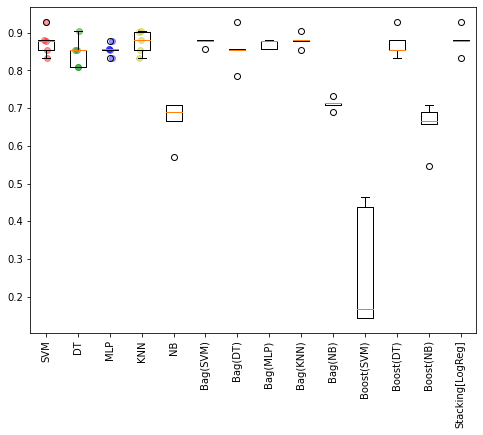

In [ ]:
# 
vals, names, xs = [],[],[]
for i, col in enumerate(boxplot_df.columns):
    vals.append(boxplot_df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, boxplot_df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
# 
# 
# 
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()
# 
# 

## Docs

In [ ]:
# 
# boxplot_df = pd.DataFrame({
# 'Models': models_x,
# 'Accuracy Score': [model_clf.score(_phase2_fs_X_test, _phase2_fs_y_test) for model_clf in model_clfs]
# })
# 
# # 
# # 
# # boxplot(df)
# plt.figure(figsize=(18,6))
# sns.boxplot(x=boxplot_df['Models'],y=boxplot_df['Accuracy Score'], data=boxplot_df, width=0.8)
# # 
# # 
# 
# # Create Data
# x=['A','B','C','D','E','F','G','H','I','J']
# y = np.random.randint(low=0, high=100, size=10)
# 
# # Simple Bar Plot
# plt.bar(x,y)
# plt.xlabel('Categories')
# plt.ylabel("Values")
# plt.title('Categories Bar Plot')
# plt.show()
# 
# 
# 
# # mutual_info
# # 
# mutual_info_x = list(mutual_info.keys())
# # 
# mutual_info_y = list(mutual_info.values())
# # 
# # Simple Bar Plot
# plt.figure(figsize=(14,4))
# plt.bar(mutual_info_x, mutual_info_y)
# plt.xlabel('Features')
# plt.xticks(rotation=90)
# plt.ylabel("Scores")
# plt.title('Mutual Info')
# plt.show()
# 
# 
# https://towardsdatascience.com/the-eda-theoretical-guide-b7cef7653f0d
# https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7
# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
# https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872
# https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
# https://towardsdatascience.com/scattered-boxplots-graphing-experimental-results-with-matplotlib-seaborn-and-pandas-81f9fa8a1801
# https://htmlcolorcodes.com/
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=a%20ROC%20curve.-,What%20Are%20ROC%20Curves%3F,values%20between%200.0%20and%201.0.
# 
# 
# 
# 
# 